## Diversidados
### Desafio Aula 5: Aplicação de modelos na prática

### Análise Exploratória dos Dados

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Analise de Dados Python/policy_dataset.csv')

In [ ]:
df.head(3)

,Unnamed: 0,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,pii_cpf,spends,credit_line,revolving_balance,risk_prediction,spend_prediction
0,0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,07:52:34,444,leidelaura@outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,203.885.319-32,1542.456667,1995,11.736667,0.136537,2775.111026
1,1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346,diocezio@gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,906.026.321-96,1656.690000,2766,93.320000,0.127070,2695.438639
2,2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,00:60:02,6,ha+nds@gmail.com,NaN,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,046.615.891-22,49.173333,2537,18.456667,0.124733,2723.107941


In [ ]:
# Listando os nomes das variáveis
for c in df.columns:
  print(c)

Unnamed: 0
ids
target_default
score_1
score_2
score_3
score_4
score_5
score_6
risk_rate
last_amount_borrowed
last_borrowed_in_months
credit_limit
reason
income
facebook_profile
state
zip
channel
job_name
real_state
ok_since
n_bankruptcies
n_defaulted_loans
n_accounts
n_issues
application_time_applied
application_time_in_funnel
email
external_data_provider_credit_checks_last_2_year
external_data_provider_credit_checks_last_month
external_data_provider_credit_checks_last_year
external_data_provider_email_seen_before
external_data_provider_first_name
external_data_provider_fraud_score
lat_lon
marketing_channel
profile_phone_number
reported_income
shipping_state
shipping_zip_code
profile_tags
user_agent
pii_cpf
spends
credit_line
revolving_balance
risk_prediction
spend_prediction


In [ ]:
# Obtendo algumas estatísticas das variáveis
df.describe()

,Unnamed: 0,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code,spends,credit_line,revolving_balance,risk_prediction,spend_prediction
count,41741.00000,41741.000000,41741.000000,41741.000000,41741.000000,41741.000000,14133.000000,14133.000000,28632.000000,4.174100e+04,17276.000000,41606.000000,41729.000000,41741.000000,30818.000000,41741.000000,20711.0,41741.000000,27720.000000,39656.000000,41741.000000,41741.0,41741.000000,41741.000000,41741.000000,41741.000000,41741.000000,41741.000000
mean,20870.00000,346.459836,100.006820,0.499416,99.919399,0.294451,13328.104095,40.588410,33877.220453,7.108012e+04,35.192174,0.076696,0.004625,10.639108,11.023882,247.748545,0.0,1.504396,0.504185,12.731188,500.491771,inf,33910.856688,2830.088883,6442.672552,464.804461,0.159682,2830.088885
std,12049.73313,110.102271,3.183821,0.288085,10.022703,0.101561,7918.698433,9.437936,36141.985884,5.225978e+04,21.629577,0.274820,0.080157,4.588175,4.596036,146.326172,0.0,1.114207,0.499992,125.711218,287.993121,NaN,12696.432491,2456.812977,4546.717582,839.417243,0.069825,240.307693
min,0.00000,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-999.000000,0.000000,403.0,12001.000000,0.000000,506.000000,0.000000,0.013181,1472.665520
25%,10435.00000,270.000000,97.862546,0.251595,93.182517,0.220000,7210.280000,36.000000,9975.000000,4.401958e+04,17.000000,0.000000,0.000000,7.000000,8.000000,120.000000,0.0,1.000000,0.000000,11.000000,252.000000,50910.0,22914.000000,1021.536667,2954.000000,8.133333,0.113500,2729.696785
50%,20870.00000,340.000000,100.017950,0.500174,99.977774,0.290000,12011.050000,36.000000,25213.000000,6.004409e+04,32.000000,0.000000,0.000000,10.000000,10.000000,248.000000,0.0,2.000000,1.000000,27.000000,502.000000,101623.0,33877.000000,2082.143333,5311.000000,102.303333,0.150634,2810.101788
75%,31305.00000,420.000000,102.143100,0.747630,106.630991,0.360000,18030.160000,36.000000,46492.500000,8.503289e+04,50.000000,0.000000,0.000000,13.000000,14.000000,375.000000,0.0,2.000000,1.000000,43.000000,747.000000,151248.0,44923.000000,3923.400000,8743.000000,542.473333,0.195369,2888.810425
max,41740.00000,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,5.000000,5.000000,49.000000,49.000000,500.000000,0.0,3.000000,1.000000,59.000000,1000.000000,inf,56000.000000,18455.696667,20484.000000,12500.113333,0.725531,5853.347843


1) A inadimplência é o aspecto mais sensível quando se fala em crédito (target_default). Faça algumas visualizações que explorem a inadimplência na base fornecida.

In [ ]:
# Vamos analisar se o número de inadimplentes é maior ou menor 
quant = df.target_default.value_counts()
percent = df.target_default.value_counts(normalize=True)

print(quant)
print(percent)

False    35080
True      6661
Name: target_default, dtype: int64
False    0.840421
True     0.159579
Name: target_default, dtype: float64


Podemos afirmar com as informações acima que temos mais não inadimplentes do que inadimplentes

Vamos agora plotar um gráfico para analisarmos se existe alguma relação com o limite de crédito e o fato do cliente ser ou não inadimplente

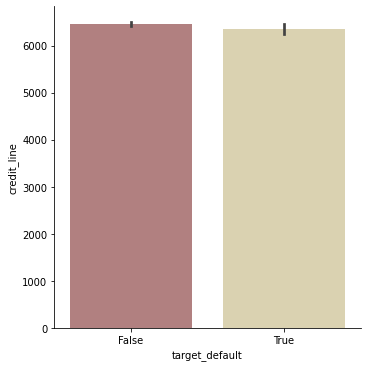

In [ ]:
sns.catplot(x="target_default", y="credit_line", kind="bar", data=df, palette='pink')

Apesar de tendermos a achar que o limite de crédito influencia em ser inadimplente ou não, o gráfico acima nos mostra que essa relação não é muito relevante, pois temos uma quantidade parecida entre inadimplentes e não inadimplentes.

Vmos analisar agora se existe alguma relação com os gastos mensais e inadimplência

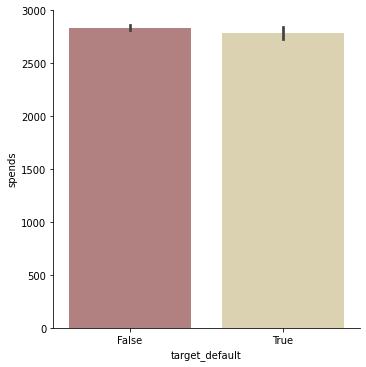

In [ ]:
sns.catplot(x="target_default", y="spends", kind="bar", data=df, palette='pink')

Podemos perceber observando o gráfico acima, que não existe uma relação relevante entre os gastos e a inadimplência. Mas será que podemos obter uma relação entre os gastos e a renda salarial? Para isso vamos criar uma nova variável, colocando a variável "income" (renda estimada)  em faixas salariais.

In [ ]:
df.income.min()

4821.18

In [ ]:
df.income.max()

5000027.83

Primeiro vamos criar uma função para distribuir a renda em faixas:

In [ ]:
# criando a função "faixa_Sal"
def faixa_sal(x):
  if 4000 < x < 6000:
    return 1
  if 6000 < x < 8000:
    return 2
  if 8000 < x < 10000:
    return 3
  if 10000 < x < 12000:
    return 4
  if 12000 < x < 14000:
    return 5
  if 14000 < x < 16000:
    return 6
  if 16000 < x < 18000:
    return 7
  if 18000 < x < 20000:
    return 8
  elif x > 20000:
    return 9

In [ ]:
# Aplicando a função para cada observação nda coluna income e atribuindo a uma nova variável "renda_faixa"
df['renda_faixa'] = df['income'].apply(faixa_sal)

Agora vamos visualizar essa relação:

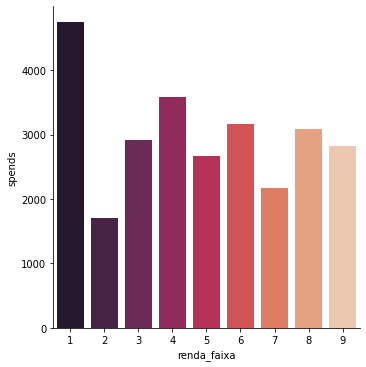

In [ ]:
sns.catplot(x="renda_faixa", y="spends", kind="bar", data=df, palette='rocket', ci=None)

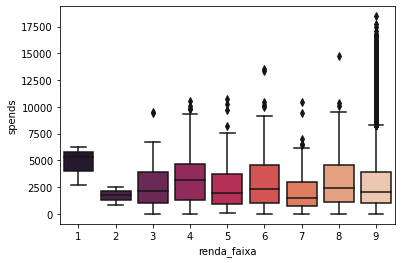

In [ ]:
sns.boxplot(x="renda_faixa", y="spends", data=df, palette='rocket')

Podemos observar que as pessoas com menor faixa salarial, tendem a gastar mais com cartão de crédito. Enquanto que o grupo com rendas altas se concentram em faixas de gastos menores mas, por outro lado é onde temos casos de gastos acima de 7/ 8 mil pra mais. Provavelmente por terem condição financeira e limites de créditos maiores. Lembrando que nossas faixas são de 2 em 2 mil começando em 4 mil e a faixa mais alta (9) são aqueles com renda acima de 20 mil.

Outra análise que podemos fazer, é avaliar se aqueles considerados inadimpentes possuem uma pontuação de risco maior.

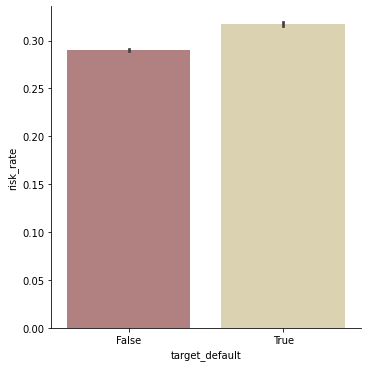

In [ ]:
sns.catplot(x="target_default", y="risk_rate", kind="bar", data=df, palette='pink')

Apesar de não ser discrepante a diferença, podemos ver que mais inadimplentes foram classificados em faixas maiores de risco do que os não inadimplentes.

Por fim, vamos procurar se existe uma relação entre inadimplência e empréstimo. Para isso, vamos considerar que  os dados NaN da variável "last_amount_borrowed" são os clientes que nunca fizeram empréstimo e criar uma nova variável categórica "empréstimo":

In [ ]:
# preenchendo os dados ausentes da variável "last_amount_borrowed" com 0
df.last_amount_borrowed.fillna(0, inplace=True)

In [ ]:
# criaremos uma função para criar a categoria "empréstimo", sendo 0 = "Não" e 1 = "Sim"
def emp(x):
  if x > 0:
    return 1
  else:
    return 0

In [ ]:
# Aplicando a função para criar a nova variável
df['emprestimo'] = df['last_amount_borrowed'].apply(emp)

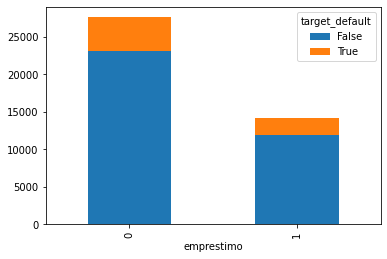

In [ ]:
# plotando um gráfico para avaliarmos alguma relação
pd.crosstab(df['emprestimo'], df['target_default']).plot(kind='bar', stacked=True)

Podemos observar no gráfico, algo esperado: O maior número de inadimplentes está no grupo que não realizou empréstimo. O que faz bastante sentido, uma vez ue o banco, para liberar ou não um empréstimo, avalia se o cliente possui histórico de não inadimplência.

2) Analisando a distribuição do volume de compras em 3 meses dos clientes (variável "spends"), você diria que ela segue uma distribuição normal? Há algo de estranho nela? Se sim, qual seria a justificativa ou hipótese para tal?

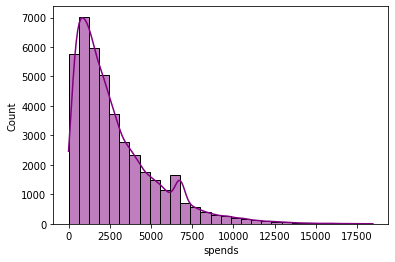

In [ ]:
sns.histplot(data=df, x='spends', bins=30, kde=True, color='purple')

**Observações**: Não é uma distribuição normal e podemos ver que há um pico, em torno dos 6.500.

Podemos pensar em várias possibilidades para esse pico. Podemos estar olhando para um quadro de crise ou pandemia, onde as pessoas podem aumentar os seus gastos, seja com empréstimos ou compras exageradas, influenciadas pelo medo e pressão. Mas não temos variáveis no banco que nos detalhe essa informação. 

## Problema de Negócio
### Construir uma política para decidir:
   - Se o cliente deve ser aprovado ou não.
   - Qual o limite inicial que esse cliente deve receber.

### Vamos iniciar calculando o valor de um cliente, qual a receita real de um cliente individual?

## Receita
### Taxa de juros do rotativo 10%

In [ ]:
df['taxa_juros_rotativo'] = np.where(df.target_default == 0, 0.1 * df.revolving_balance,0)

In [ ]:
df.taxa_juros_rotativo.describe()

count    41741.000000
mean        39.081120
std         79.070049
min          0.000000
25%          0.030667
50%          4.365000
75%         42.681333
max       1250.011333
Name: taxa_juros_rotativo, dtype: float64

### Intercâmbio: Representa uma porcentagem de todos os gastos do cliente no cartão de crédito. Para o problema iremos assumir que a taxa de intercâmbio é fixa em 2% e portanto de todos os gastos do cliente, 2% se torna receita para o Nubank.

In [ ]:
df['intercambio'] = np.where(df.target_default == 0, 0.02 * df.spends, 0)

In [ ]:
df.intercambio.describe()

count    41741.000000
mean        47.692764
std         49.688579
min          0.000000
25%         10.319600
50%         32.630533
75%         69.690067
max        369.113933
Name: intercambio, dtype: float64

### Custos Operacionais

### Os custos por sua vez vem de três fontes principais: Custos operacionais, custos de emissão do cartão e perdas por inadiplêmcia.

 - Custos operacionais: Representam custos de atendimento e infrastrutura gastos com cada novo cliente, para o problema podemos assumir que cada cliente custa R$ 10,00 ao Nubank em custos operacionais.


 - Custos de cartão: Custo de emissão do cartão para o cliente, para o problema vamos assumir um custo de R$ 5,00.

 
 - Perdas por inadimplência: referem-se ao valor perdido caso o cliente não pague a sua fatura, para esse desafio vamos assumir que se o cliente se torna inadimplemente perdemos o valor total de sua fatura

In [ ]:
df['custo_cartao'] = 5
df['custo_operacional'] = 10
df['perda_inadimplencia'] = np.where(df.target_default == 1, df['spends'], 0)

In [ ]:
df.perda_inadimplencia.describe()

count    41741.000000
mean       445.450690
std       1409.989742
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      16752.666667
Name: perda_inadimplencia, dtype: float64

### Valor Total de cada cliente

In [ ]:
df['total_custos'] = df['custo_operacional'] + df['custo_cartao'] + df['perda_inadimplencia']

In [ ]:
df['total_receitas'] = df['intercambio'] + df['taxa_juros_rotativo']

In [ ]:
df['lucro_cliente'] = df['total_receitas'] - df['total_custos']

In [ ]:
df['lucro_cliente'].describe()

count    41741.000000
mean      -373.676806
std       1441.545481
min     -16767.666667
25%         -0.763200
50%         33.947267
75%        100.268667
max       1583.652533
Name: lucro_cliente, dtype: float64

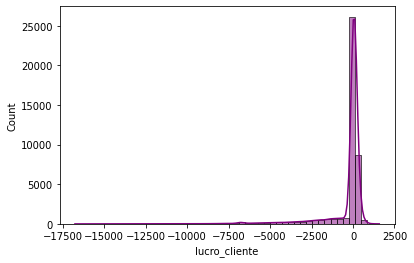

In [ ]:
sns.histplot(data=df, x='lucro_cliente', bins=50, kde=True, color='purple')